<a href="https://colab.research.google.com/github/strongeryoung/Oracle_Bio_Service-development/blob/main/LSTM_movie_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요한 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# 데이터셋 로딩
num_words = 10000  # 가장 빈도 높은 단어 10,000개 사용
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# 단어 인덱스 가져오기 및 원본 텍스트로 변환하는 함수 정의
word_index = imdb.get_word_index()
reverse_word_index = {value+3: key for key, value in word_index.items()}
reverse_word_index[0] = "<PAD>"
reverse_word_index[1] = "<START>"
reverse_word_index[2] = "<UNK>"
reverse_word_index[3] = "<UNUSED>"

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i, '?') for i in encoded_review])

# 데이터셋 정보 확인
print('훈련 샘플 개수:', len(X_train))
print('테스트 샘플 개수:', len(X_test))

# 입력 데이터 샘플 확인 (첫 번째 샘플)
print('첫 번째 리뷰 길이:', len(X_train[0]))
print('첫 번째 리뷰 레이블:', y_train[0])
print('첫 번째 리뷰 원문:', decode_review(X_train[0]))
print('첫 번째 리뷰 샘플 (숫자):', X_train[0])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
훈련 샘플 개수: 25000
테스트 샘플 개수: 25000
첫 번째 리뷰 길이: 218
첫 번째 리뷰 레이블: 1
첫 번째 리뷰 원문: <START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left ou

In [ ]:
print('첫 번째 리뷰 레이블:', y_train[0])
print('첫 번째 리뷰 원문:', decode_review(X_train[0]))
print('첫 번째 리뷰 샘플 (숫자):', X_train[0])


print('첫 번째 리뷰 레이블:', y_train[1])
print('첫 번째 리뷰 원문:', decode_review(X_train[1]))
print('첫 번째 리뷰 샘플 (숫자):', X_train[1])

첫 번째 리뷰 레이블: 1
첫 번째 리뷰 원문: <START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing an

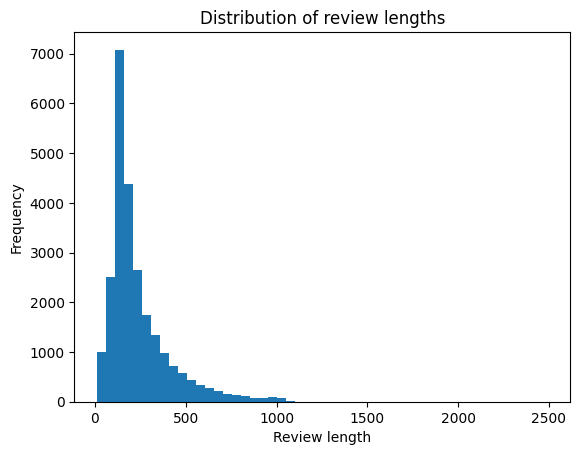

In [ ]:
# 데이터 시퀀스 길이 시각화
review_lengths = [len(review) for review in X_train]
plt.hist(review_lengths, bins=50)
plt.xlabel('Review length')
plt.ylabel('Frequency')
plt.title('Distribution of review lengths')
plt.show()

# 데이터 전처리 (패딩)
max_len = 300  # 최대 시퀀스 길이
X_train_padded = pad_sequences(X_train, maxlen=max_len)
X_test_padded = pad_sequences(X_test, maxlen=max_len)

In [ ]:
# 모델 정의
model = Sequential()
model.add(Embedding(num_words, 64, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train_padded, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

# 모델 평가
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 72s 221ms/step - accuracy: 0.5579 - loss: 0.6886 - val_accuracy: 0.7738 - val_loss: 0.5401
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 222ms/step - accuracy: 0.8180 - loss: 0.4497 - val_accuracy: 0.8652 - val_loss: 0.3308
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 89s 244ms/step - accuracy: 0.8938 - loss: 0.2764 - val_accuracy: 0.8820 - val_loss: 0.2952
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 79s 234ms/step - accuracy: 0.9196 - loss: 0.2218 - val_accuracy: 0.8856 - val_loss: 0.2915
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 78s 223ms/step - accuracy: 0.9401 - loss: 0.1819 - val_accuracy: 0.8856 - val_loss: 0.2830
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 87s 241ms/step - accuracy: 0.9460 - loss: 0.1641 - val_accuracy: 0.8836 - val_loss: 0.2922
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 78s 228ms/step - accuracy: 0.9608 - loss: 0.1285 - val_accuracy: 0.8734 - val_loss: 0.3362
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 75s 239ms/step - accuracy: 0.9649 - loss: 0

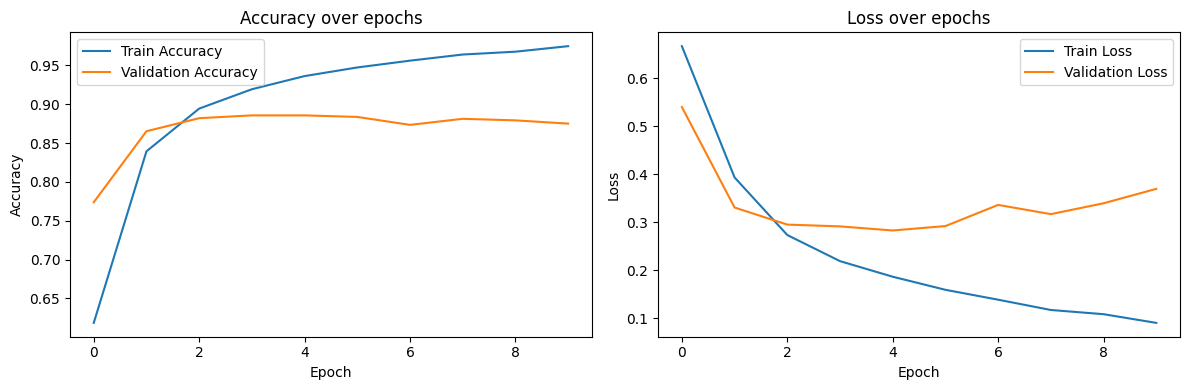

In [ ]:
# 학습 과정 시각화
plt.figure(figsize=(12, 4))

# 정확도 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

# 손실 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()

plt.tight_layout()
plt.show()